## EX.1

$$A =
\begin{bmatrix}
    -5 & -2 & -7\\
    12 & 10 & 2\\
    -5 & -2 & -7\\
    7 & 8 & 5\\
\end{bmatrix}$$

We can see that last line is first + second and the third is the same as first, so we can told it to go away.

$$A =
\begin{bmatrix}
    -5 & -2 & -7\\
    12 & 10 & 2\\
\end{bmatrix} = 
\begin{bmatrix}
    -5 & -2 & -7\\
    2 & 6 & -12\\
\end{bmatrix} = 
\begin{bmatrix}
    1 & 3 & -6\\
    -5 & -2 & -7\\
\end{bmatrix} = 
\begin{bmatrix}
    1 & 3 & -6\\
    0 & -13 & -37\\
\end{bmatrix}$$

So left lines are lineary independent and B, C is:

$$ B \cdot C =
\begin{bmatrix}
    1 & 0\\
    0 & 1\\
    1 & 0\\
    1 & 1\\
\end{bmatrix} \cdot
\begin{bmatrix}
    1 & 3 & -6\\
    -5 & -2 & -7\\
\end{bmatrix}
=
\begin{bmatrix}
    -5 & -2 & -7\\
    12 & 10 & 2\\
    -5 & -2 & -7\\
    7 & 8 & 5\\
\end{bmatrix} = A$$

In [150]:
import numpy as np
#make PseudoInv from Skelet
def pseudo_inv(B, C):
    return C.T @ np.linalg.inv(C @ C.T) @ np.linalg.inv(B.T @ B) @ B.T

In [154]:
print(pseudo_inv(np.array([[1, 0],
                           [0, 1],
                           [1, 0],
                           [1, 1]]), 
                np.array([[-5, -2, -7],
                           [12, 10, 2]])))

[[-0.01313285  0.02874001 -0.01313285  0.01560716]
 [ 0.0056338   0.02535211  0.0056338   0.03098592]
 [-0.04937191  0.00079939 -0.04937191 -0.04857252]]


## EX.2

In [97]:
def svd(a):
    if a.shape[0] >= a.shape[1]:
        m = a @ a.T
        s, u = np.linalg.eig(m)
        s = np.diagflat(np.append(s, [0]))
        for i in range(len(s)):
            if (s[i][i] == 0):
                s = s[:i, :i]
                u = u[:, :i]
        s_inv = s.copy()
        for i in range(len(s)):
            s_inv[i][i] = s_inv[i][i] ** (-1)
        v = s_inv @ u.T @ a
        return u, s, v

    m = a.T @ a
    s, v = np.linalg.eig(m)
    s = np.diagflat(np.append(s, [0]))
    for i in range(len(s)):
        if (s[i][i] == 0):
            s = s[:i, :i]
            v = v[:i,:]
    s_inv = s.copy()
    for i in range(len(s)):
        s_inv[i][i] = s_inv[i][i] ** (-1)
    u = s_inv @ v.T @ a
    return u, s, v

In [197]:
u, s, v = svd(np.array([[1, 1, 0],
                        [1, 1, 0],
                        [0, 0, 1],
                        [1, 0, -1]]))
print(u @ s @ v, sep = '\n')

[[  1.00000000e+00   1.00000000e+00   2.56739074e-16]
 [  1.00000000e+00   1.00000000e+00   1.04083409e-17]
 [  2.77555756e-17  -8.32667268e-17   1.00000000e+00]
 [  1.00000000e+00  -3.60822483e-16  -1.00000000e+00]]


Try SVD for pseudoinv but get only govno:

In [126]:
def pseudo_inv_svd(a):
    u, s, v = svd(a)
    s_inv = s.copy()
    for i in range(len(s)):
        s_inv[i][i] = s_inv[i][i] ** (-1)
    return v.T @ s_inv.T @ u.T

In [153]:
print(pseudo_inv_svd(np.array([[-5, -2, -7],
                           [12, 10, 2],
                           [-5, -2, -7],
                           [7, 8, -5]])))

[[ -2.08476430e+12+0.j  -6.61932183e+12+0.j  -4.53455753e+12+0.j
    6.61932183e+12+0.j]
 [ -3.75545890e+12+0.j  -4.33489675e+12+0.j  -5.79437847e+11+0.j
    4.33489675e+12+0.j]
 [  3.96609770e+12+0.j  -6.88082978e+11+0.j  -4.65418068e+12+0.j
    6.88082978e+11+0.j]]


## EX.3

$$A =
\begin{bmatrix}
    3 & -4 & -1 & 0 \\
    9 & 5 & -2 & -6 \\
    -1 & -1 & 0 & 0 \\
    12 & 1 & -3 & -8 \\
\end{bmatrix}$$

We can see that last line is first + second, so we can told it to go away.

$$A =
\begin{bmatrix}
    3 & -4 & -1 & 0 \\
    9 & 5 & -2 & -6 \\
    -1 & -1 & 0 & 0 \\
\end{bmatrix} = 
\begin{bmatrix}
    1 & 1 & 0 & 0 \\
    0 & -7 & -1 & 0 \\
    0 & -4 & -2 & -6 \\
\end{bmatrix} = 
\begin{bmatrix}
    1 & 1 & 0 & 0 \\
    0 & 1 & 0.5 & 1.5 \\
    0 & 0 & -4.5 & -10.5 \\
\end{bmatrix}$$

So left lines are lineary independent and B, C is:
$$ B \cdot C =
\begin{bmatrix}
    1 & 0 & 0\\
    0 & 1 & 0\\
    0 & 0 & 1\\
    1 & 1 & 0\\
\end{bmatrix} \cdot
\begin{bmatrix}
    3 & -4 & -1 & 0 \\
    9 & 5 & -2 & -6 \\
    -1 & -1 & 0 & 0 \\
\end{bmatrix}
=
\begin{bmatrix}
    3 & -4 & -1 & 0 \\
    9 & 5 & -2 & -6 \\
    -1 & -1 & 0 & 0 \\
    12 & 1 & -3 & -8 \\
\end{bmatrix} = A$$

In [155]:
def lstsq(B, C, b):
    A_plus = pseudo_inv(B, C)
    return A_plus @ b

In [158]:
print(lstsq(np.array([[1, 0, 0],
                           [0, 1, 0],
                           [0, 0, 1],
                           [1, 1, 0]]), 
                np.array([[3, -4, -1, 0],
                          [9, 5, -2, 6],
                          [-1, -1, 0, 0]]),
                np.array([-3, 5, 0, 3])))

[-0.40220386  0.40220386 -0.14876033  1.10743802]


## EX.4

In [186]:
import numpy as np
from random import random
import matplotlib.pyplot as pl
from math import pi, sin

def graph(deg):
    data = np.array([[1937, 0],
                    [1949, 0],
                    [1950, -1],
                    [1951, -6],
                    [1952, -1],
                    [1953, -3],
                    [1954, -2],
                    [1956, -4],
                    [1957, -1],
                    [1959, -5],
                    [1960, -4],
                    [1962, 1],
                    [1963, 0],
                    [1964, -2],
                    [1965, -6],
                    [1966, -1],
                    [1967, 1],
                    [1968, -3],
                    [1969, 2],
                    [1970, -2],
                    [1973, -2],
                    [1974, 2],
                    [1975, -3],
                    [1976, -1],
                    [1977, 2],
                    [1978, 2],
                    [1979, -1],
                    [1980, -2],
                    [1981, -1],
                    [1982, 2],
                    [1983, -2],
                    [1984, -4],
                    [1985, -3],
                    [1986, 0],
                    [1988, -4],
                    [1989, -3],
                    [1990, 0],
                    [1991, 1],
                    [1992, -3],
                    [1993, -8],
                    [1994, -3],
                    [1995, -3],
                    [1996, 4],
                    [1997, -1],
                    [1998, -8],
                    [1999, -5],
                    [2000, 0],
                    [2001, -1],
                    [2002, -2],
                    [2003, 1],
                    [2004, -2],
                    [2005, 1],
                    [2006, 1],
                    [2007, -2],
                    [2008, 2],
                    [2009, 2],
                    [2010, 3],
                    [2011, 0],
                    [2012, 2],
                    [2013, 4],
                    [2014, -1],
                    [2015, 1],])
    x_data = data[ : ,0]
    y_train = data[ : ,1]
    x_train = np.zeros((0, len(x_data)))
    for d in range(deg):
        x_temp = x_data
        x_temp = x_temp ** float(d)
        x_train = np.vstack((x_temp, x_train))
    list_coord = np.linalg.inv(x_train @ np.transpose(x_train)) @ x_train @ np.transpose(y_train)

    
    pl.figure(figsize=(8, 5))
    pl.grid(True)
    pl.title('Linear Regression')

    def line(x):
        ans = 0
        d = deg - 1
        for wi in list_coord:
            ans += wi * x ** float(d)
            d -= 1
        return ans

    pl.plot(x_data, [line(x) for x in x_data], color='green', linewidth=2, alpha=0.3)
    pl.scatter(x_train[deg - 2, :], y_train, s=80, color='blue', alpha=0.3)
    pl.show()
    return line(2017)

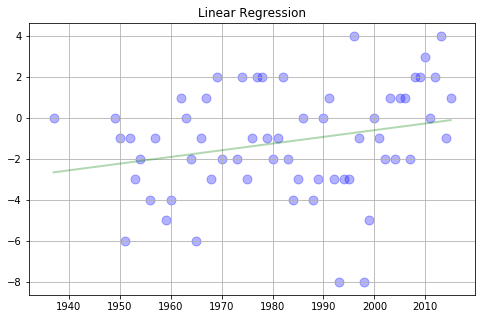

-0.037504995838816058

In [188]:
graph(2)

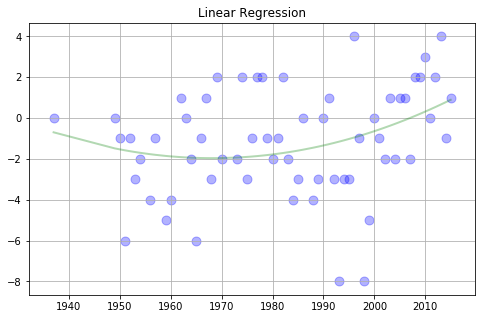

1.1448813550969135

In [193]:
graph(3)

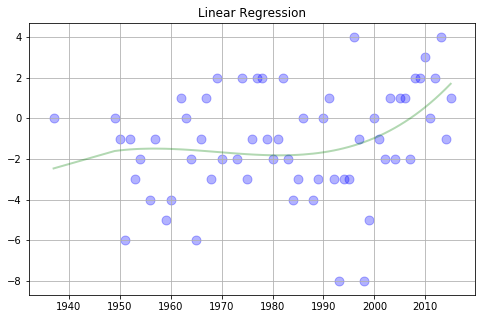

2.2376711840042844

In [194]:
graph(4)

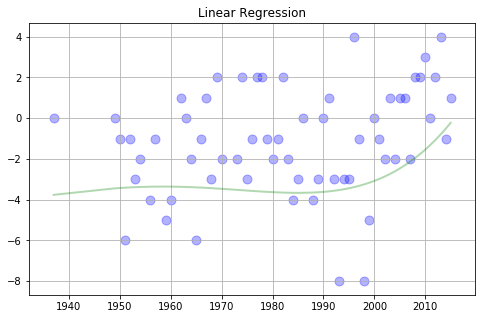

0.42836238443851471

In [191]:
graph(5)

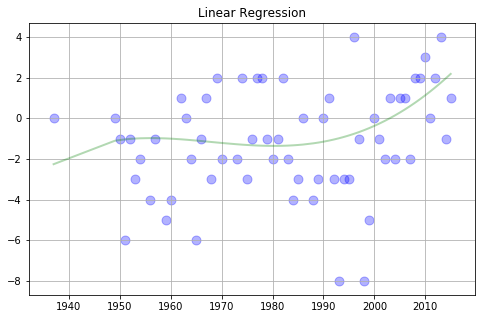

2.663397952914238

In [195]:
graph(6)

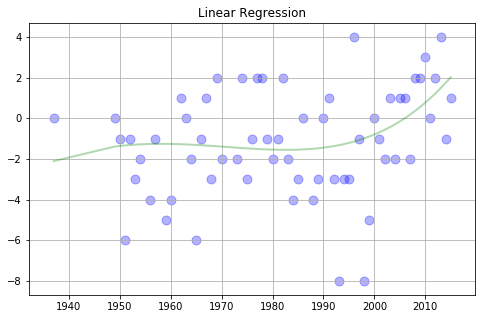

2.6212304318323731

In [192]:
graph(7)

Real average temp is 1.683333, so the closest solution is with deg = 3

## EX.5

$$A =
\begin{bmatrix}
    0_{1,1} & 0_{1,2} & 0_{1,3} & \dots  & 0_{1,10} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    0_{6,1} & 1_{6,2} & 0_{6,3} & \dots  & 0_{6,10} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    0_{9,1} & 0_{9,2} & 1_{9,3} & \dots  & 0_{9,10} \\
    0_{10,1} & 0_{10,2} & 0_{10,3} & \dots  & 0_{10,10} \\
\end{bmatrix} = B \cdot C = 
\begin{bmatrix}
    0_{1,1} & 0_{1,2} \\
    \vdots & \vdots \\
    1_{6,1} & 0_{6,2} \\
    \vdots & \vdots \\
    0_{9,1} & 1_{9,2} \\
    0_{10,1} & 0_{10,2} \\
\end{bmatrix} \cdot 
\begin{bmatrix}
    0_{1,1} & 1_{1,2} & 0_{1,3} & \dots  & 0_{1,10} \\
    0_{2,1} & 0_{2,2} & 1_{2,3} & \dots  & 0_{2,10} \\
\end{bmatrix}
$$

In [198]:
B = np.zeros((10, 2))
C = np.zeros((2, 10))
B[5, 0] = 1
B[8, 1] = 1 
C[0, 1] = 1
C[1, 2] = 1
print(pseudo_inv(B, C))

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


## EX.6

$$L(x) = \sum \limits_{i = 0}^n y_i \cdot l_i(x)$$
$$l_i(x) = \frac{x - x_0}{x_i - x_0} \cdots \frac{x - x_n}{x_i - x_n}$$
We have pairs of $x$ and $y$:
(-1, -2), (0, 3), (7, 486), (4, 123)

LET'S COUNT!

$$l_0(x) = -\frac{x}{1}\cdot\frac{x - 7}{8}\cdot\frac{x - 4}{5} = -\frac{x(x - 7)(x - 4)}{40}$$
$$l_1(x) = \frac{x + 1}{1}\cdot\frac{x - 7}{-7}\cdot\frac{x - 4}{-4} = \frac{(x + 1)(x - 7)(x - 4)}{28}$$
$$l_2(x) = \frac{x + 1}{8}\cdot\frac{x}{7}\cdot\frac{x - 4}{3} = \frac{x(x + 1)(x - 4)}{168}$$
$$l_3(x) = \frac{x + 1}{5}\cdot\frac{x}{4}\cdot\frac{x - 7}{-3} = -\frac{x(x + 1)(x - 7)}{60}$$

$\\L(x) = -2 \cdot l_0(x) + 3 \cdot l_1(x) + 486 \cdot l_2(x) + 123 \cdot l_3(x) = \frac{x(x - 7)(x - 4)}{20} + \frac{3(x + 1)(x - 7)(x - 4)}{28} + \frac{28x(x + 1)(x - 4)}{81} - \frac{123x(x + 1)(x - 7)}{60} = x^3 (\frac{1}{20} + \frac{3}{28} + \frac{81}{28} - \frac{123}{60}) + x^2 (-\frac{1}{5} - \frac{7}{20} + \frac{3}{28} - \frac{3}{4} - \frac{3}{7} + \frac{81}{21} - \frac{81}{7} - \frac{123}{60} + \frac{123 \cdot 7}{60}) + x(\frac{28}{20} - \frac{21}{28} - \frac{12}{28} + 3 - \frac{81}{7} + \frac{123 \cdot 7}{60}) + 3 = x^3 + 2x^2 + 6x + 3$

And this is true!

## EX.7

$$B = \{(x, y) \mid 36x^2 + 16y^2 \le 144\} = \{(x, y) \mid \frac{1}{4}x^2 + \frac{1}{9}y^2 \le 1\}$$

Our matrix:

$$A =
\begin{pmatrix}
    \frac{1}{4} & 0 \\
    0 & \frac{1}{9} \\
\end{pmatrix}$$
$$ \Delta_1 = \frac{1}{4} \gt 0$$
$$ \Delta_2 = \frac{1}{36} \gt 0$$

So because of Minkovsky theorem this is шар относительно какой-то нормы, поскольку является просто растяжением обычного шара - эллипсом.

Отлично, посчитаем значение для
$$v =
\begin{pmatrix}
    5\\
    -3 \\
\end{pmatrix}$$

Пусть $v_a$ лежит на сфере соответсвующей шару, тогда: $v_a =
\begin{pmatrix}
    5a\\
    -3a \\
\end{pmatrix}$, и удовлетворяет $B$:

$$\frac{1}{4}(5a)^2 + \frac{1}{9}(-3a)^2 = 1 = \frac{25a^2}{4} + a^2 = \frac{29a^2}{4}$$
$$ a^2 = \frac{4}{29}$$
$$ a = \frac{2}{\sqrt{29}} $$

Тогда если $n$ - наша норма:
$$n(v) = n(\frac{v_a}{a}) = \frac{1}{a}n(v_a) = \frac{1}{a} = \frac{\sqrt{29}}{2}$$